In [1]:
from graph import create_graph

graph = create_graph()

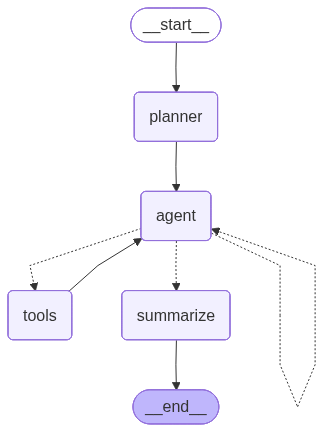

In [ ]:
from IPython.display import display, Image

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))   

In [3]:
from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    request: str
    response: str
    response_summary: str
    url: str
    tool_call_count: int

In [4]:
initial_state: State = {
        "messages": [],
        "request": "Search for the term 'LangGraph' on the page and provide a summary of the content found.",
        "summary": "",
        "url": "https://bing.com",
        "tool_call_count": 0,
        "plan": "",
        "response": "",
        
    }

final_state = graph.invoke(initial_state)

ValueError: Unexpected message type: 'content'. Use one of 'human', 'user', 'ai', 'assistant', 'function', 'tool', 'system', or 'developer'.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 

In [5]:
final_state

{'messages': [SystemMessage(content='\nYou are a web-interacting agent. Your goal is to complete the given request with the help of tools that allow you to interact with websites.\nYou will be provided with a URL and a request. Use the selenium tools to navigate to the website and find the information needed to complete the request.\nMake sure to follow the instructions carefully and use the tools as needed.\n\nThe tools you can use are:\n- create_driver: Creates a new web driver instance.\n- access_url: Accesses a given URL using the driver.\n- find_element: Finds an element on the page using various locator methods (name, id, xpath, css, class, tag, link_text, partial_link_text).\n- click_element: Clicks on a web element.\n- search_element: Inputs a search query into an element and presses Enter.\n- get_html_from_driver: Gets the HTML content from the current page.\n- simplify_html: Simplifies the HTML content to extract meaningful text.\n- close_driver: Closes the web driver instanc

In [1]:
def fetch_page_accessibility_tree(
    browser,
    # client: CDPSession,
    current_viewport_only: bool,
):
    accessibility_tree = browser.execute_cdp_cmd(
        "Accessibility.getFullAXTree", {}
    )["nodes"]

    # a few nodes are repeated in the accessibility tree
    seen_ids = set()
    _accessibility_tree = []
    for node in accessibility_tree:
        if node["nodeId"] not in seen_ids:
            _accessibility_tree.append(node)
            seen_ids.add(node["nodeId"])
    accessibility_tree = _accessibility_tree

    return accessibility_tree


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

chrome_options = Options()

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

driver.get("https://bing.com")

accessibility_tree = fetch_page_accessibility_tree(
    driver,
    current_viewport_only=True,
)

driver.quit()

In [5]:
from utils import dump_json_to_file

dump_json_to_file(accessibility_tree, "accessibility_tree.json")